# Simple-and-multiple-Linear-Regression

**The Problem statement:**

This data is about Cars - selling price, year, present price and the Kilometers driven 
The goal is to predict how the selling price depends on each of other factors.

In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [4]:
data = pd.read_csv(r'C:\Users\prane\Downloads\car data.csv') # loading the data

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
#data.drop(columns = 'Owner', axis = 1, inplace = True) # dropping unnecessary column

In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [17]:
# finding null values

data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
dtype: int64

### Simple Linear Regression

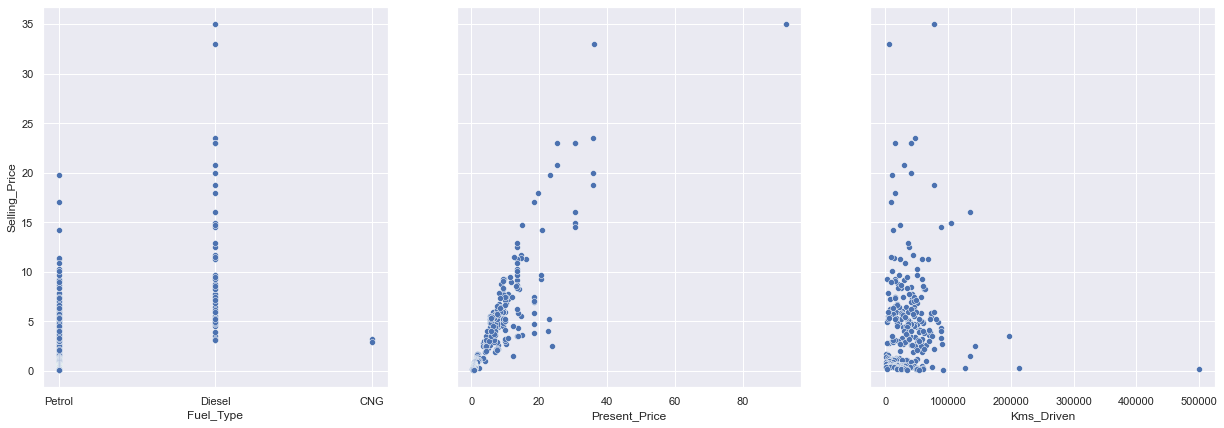

In [19]:
# visualizing the relationship between the features and the label

fig, ax = plt.subplots(1, 3, figsize = (21, 7), sharey = True)

sns.scatterplot(x = 'Fuel_Type', y = 'Selling_Price', data = data, ax = ax[0])
sns.scatterplot(x = 'Present_Price', y = 'Selling_Price', data = data, ax = ax[1])
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = data, ax = ax[2])

plt.show()

- we can see that relationship of selling_price and 'present_price' is linear but relationship of 'fuel_type' and 'kms_driven' with selling_price are not so good, so for simple linear regression we will select 'present_price' column for our model.

**we can also do feature selection using statsmodels library.**

In [20]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'Selling_Price ~ Fuel_Type', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.3050855888124937
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     65.41
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.80e-24
Time:                        20:28:34   Log-Likelihood:                -861.21
No. Observations:                 301   AIC:                             1728.
Df Residuals:                     298   BIC:                             1740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept      

In [21]:
lm = smf.ols(formula = 'Selling_Price ~ Present_Price', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.7726103146985799
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           3.60e-98
Time:                        20:29:21   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7185   

In [22]:
lm = smf.ols(formula = 'Selling_Price ~ Kms_Driven', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.0008518862620292555
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2549
Date:                Mon, 18 Apr 2022   Prob (F-statistic):              0.614
Time:                        20:30:12   Log-Likelihood:                -915.86
No. Observations:                 301   AIC:                             1836.
Df Residuals:                     299   BIC:                             1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5203      0.4

**We can see that `Present_Price` column has highest R-squared and Adj. R-squared value.**

In [24]:
# creating x and y 

feature_columns = ['Present_Price']

X = data[feature_columns]
y = data.Selling_Price

In [25]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((225, 1), (225,), (76, 1), (76,))

In [26]:
# fitting data to linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# intercept and coefficient 

print(lr.intercept_)
print(lr.coef_)

0.8657219206921871
[0.47485616]


In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred[:10]

array([ 5.32936981,  1.25795311,  3.57240203,  6.37405336, 10.25362818,
        3.70061319,  4.08999524,  1.12689281,  4.08999524,  5.32936981])

In [30]:
# accuracy of model

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

print(f"Mean Squared Error of Model is : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error of Model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of Model is : {sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error of Model is : 8.0829143372897
Mean Absolute Error of Model is : 1.721409471478796
Root Mean Squared Error of Model is : 2.843046664634561


In [31]:
# function to create adjusted R-Squared

def adj_r2(x,y):
    
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
    return adjusted_r2

In [32]:
print(lr.score(X_train, y_train)) # training accuracy of model

0.7734547720461857


In [33]:
print(adj_r2(X_train, y_train)) # adjusted r-squared

0.7724388741629847


In [34]:
print(lr.score(X_test, y_test)) # testing accuracy of model

0.7471381888067409


In [35]:
print(adj_r2(X_test, y_test)) # adjusted r-squared

0.7437211373041293


In [36]:
# comparing actual and predicted values

comp = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
comp.head

<bound method NDFrame.head of      Actual  Predicted
223    8.25   5.329370
150    0.50   1.257953
226    5.25   3.572402
296    9.50   6.374053
52    18.00  10.253628
..      ...        ...
46     2.65   3.187769
158    0.48   1.122144
230    6.15   5.329370
179    0.31   1.364321
27     6.00   3.947538

[76 rows x 2 columns]>

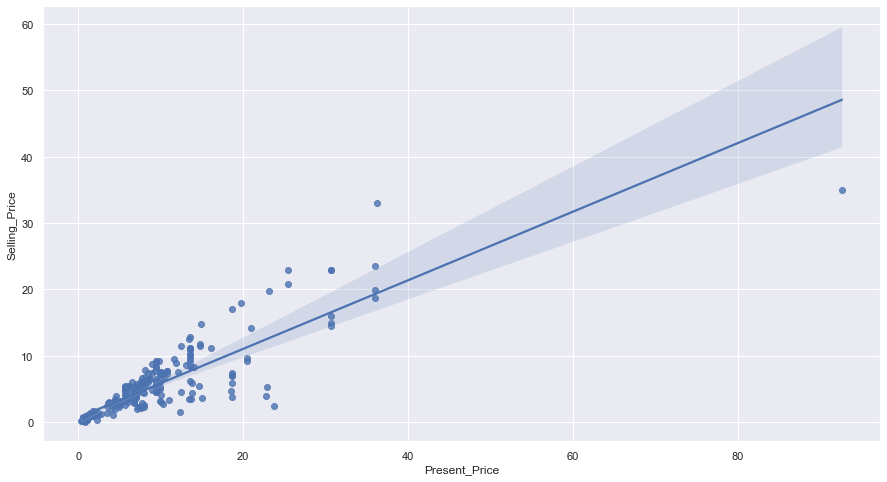

In [38]:
# Visualizing model

plt.figure(figsize = (15, 8))

sns.regplot(x = 'Present_Price', y = 'Selling_Price', data = data)
plt.show()

### Multiple Linear Regression

### Feature Selection

In [41]:
# taking all columns

lm = smf.ols(formula = 'Selling_Price ~ Fuel_Type + Present_Price  +Kms_Driven' , data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.8245889318954449
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     347.9
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          1.62e-110
Time:                        21:09:06   Log-Likelihood:                -654.02
No. Observations:                 301   AIC:                             1318.
Df Residuals:                     296   BIC:                             1337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept      

In [42]:
# taking two columns at a time


lm = smf.ols(formula = 'Selling_Price ~ Fuel_Type + Present_Price', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.7966334962521279
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     387.8
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          2.34e-102
Time:                        21:19:10   Log-Likelihood:                -676.28
No. Observations:                 301   AIC:                             1361.
Df Residuals:                     297   BIC:                             1375.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept      

In [43]:
# Present_Price and Kms_Driven

lm = smf.ols(formula = 'Selling_Price ~ Present_Price  +Kms_Driven', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.7960259751145163
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     581.5
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          1.34e-103
Time:                        21:20:03   Log-Likelihood:                -676.73
No. Observations:                 301   AIC:                             1359.
Df Residuals:                     298   BIC:                             1371.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3306   

In [45]:
# Fuel_Type and Kms_Driven

lm = smf.ols(formula = 'Selling_Price ~ Fuel_Type + Kms_Driven', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.3095836084250405
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     44.39
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           9.91e-24
Time:                        21:21:32   Log-Likelihood:                -860.23
No. Observations:                 301   AIC:                             1728.
Df Residuals:                     297   BIC:                             1743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept      

### R-squared decreases for `Fuel_Type ` and `Kms_Driven` column.

### From above we can conclude that `Fuel_Type',  'Present_Price' and 'Kms_Driven'`  columns are best for our model.

In [52]:
# creating X and y

feature_columns = ['Kms_Driven', 'Present_Price']
X = data[feature_columns]
y = data.Selling_Price

### Checking for Multi Collinearity

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_scaled

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif['features'] = X.columns

In [55]:
vif

,VIF,features
0,1.043266,Kms_Driven
1,1.043266,Present_Price


### We can see that vif is less than 5. So there is no multicollinearity.

In [56]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [57]:
X_train.shape, y_train.shape

((225, 2), (225,))

In [58]:
X_test.shape, y_test.shape

((76, 2), (76,))

In [59]:
# fitting data to model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
# prediction

y_pred = lr.predict(X_test)

In [61]:
y_pred[:10]

array([ 4.96732898,  1.67669375,  3.76313396,  6.51297331, 10.85819969,
        4.21775208,  4.12615171,  1.62500025,  4.17672243,  5.3934885 ])

In [62]:
# accuracy of model

print(f"Mean Squared Error of Model is : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error of Model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of Model is : {sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error of Model is : 7.053749029054909
Mean Absolute Error of Model is : 1.658748965346796
Root Mean Squared Error of Model is : 2.6558894986529293


In [63]:
print(lr.score(X_train, y_train)) # training accuracy of model

0.7931184778836756


In [64]:
print(adj_r2(X_train, y_train)) # adj. r-squared score

0.7912546803871322


In [65]:
print(lr.score(X_test, y_test)) # testing accuracy of model

0.779334076700411


In [66]:
print(adj_r2(X_test, y_test)) # adj. r-squared score

0.7732884349661757


### As we can see that testing accuracy is less than training accuracy we will use `Regularization` in our model to check Overfitting.

- LASSO Regularization

In [67]:
from sklearn.linear_model import Lasso, LassoCV

In [68]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, normalize=True)

In [69]:
alpha = lassocv.alpha_ # best alpha parameter
alpha

0.02840782624714399

In [70]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.02840782624714399)

In [71]:
lasso_reg.score(X_test, y_test)

0.7758623828574152

**Lasso Reg score is same as r-squared score for our model. So, we can say that our OLS model did not overfit the data.**

- Ridge Regression

In [72]:
from sklearn.linear_model import Ridge, RidgeCV

In [73]:
alphas = np.random.uniform(low= 0, high = 10, size = (50,))
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.52753754, 9.56656563, 7.18230841, 6.03716128, 2.68236328,
       6.52598057, 7.42234037, 1.18174242, 0.09800158, 7.89533391,
       5.59290863, 3.05672405, 3.93509767, 2.0160874 , 0.15154461,
       1.06875049, 4.17755818, 0.6558929 , 8.6710441 , 7.09083173,
       6.50492987, 6.18138412, 1.05592901, 4.10484911, 8.54773835,
       0.3820303 , 2.80437646, 8.93707044, 3.98445633, 6.04460537,
       9.80875046, 3.45547981, 7.30609206, 1.53325794, 7.63270343,
       2.72515079, 0.60510142, 8.46556991, 1.21483936, 3.35852036,
       1.31686523, 3.06505113, 9.89966457, 8.27984787, 2.99496793,
       5.98196531, 3.60824915, 6.0819356 , 1.91568639, 5.15369191]),
        cv=10, normalize=True)

In [74]:
alpha = ridgecv.alpha_
alpha

0.15154460525859448

In [75]:
ridge_model = Ridge(alpha = alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.15154460525859448)

In [76]:
ridge_model.score(X_test, y_test)

0.7790709142144645

**We got same r2 score using Ridge regression as well. So, it's safe to say there is no overfitting.**

- Elastic Net

In [77]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [78]:
elasticcv = ElasticNetCV(alphas = None, cv = 10)
elasticcv.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [79]:
alpha = elasticcv.alpha_
alpha

0.21951687056715954

In [80]:
elasticcv.l1_ratio

0.5

In [81]:
elasticnet_reg = ElasticNet(alpha = alpha, l1_ratio = 0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.21951687056715954)

In [82]:
elasticnet_reg.score(X_test, y_test)

0.7216383503358356

### So, we can see by using different types of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.